<a href="https://colab.research.google.com/github/Vijay-Wangg/Building-linear-regression-model/blob/main/Building_linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np

In [5]:
class linear_regression():
  def __init__(self,learning_rate,no_of_iteration):
    self.learning_rate=learning_rate
    self.no_of_iteration=no_of_iteration


  def fit(self,x,y):
  #no. of training examples and no. of features
    self.m, self.n=x.shape #it will gives the no. of rows and columns of features
    #initialse the weight and bias
    self.w=np.zeros(self.n)
    self.b=0
    self.x=x
    self.y=y
    #implementing gradient decent
    for i in range( self.no_of_iteration ):
      self.update_weights()
   

  def update_weights(self):
     y_prediction=self.predict(self.x)
     #calculate the gradient 
     dw=-2*np.sum((self.x.T).dot(self.y-y_prediction))/self.m
     db=-2*np.sum(self.y-y_prediction)/self.m
     #updating the weights
     self.w=self.w-self.learning_rate*dw
     self.b=self.b-self.learning_rate*db

  def predict(self,x):
    return x.dot(self.w)+self.b

using linear regression model for prediction

In [6]:
#importinhg the library
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
 

#data pre processing

In [7]:


#loading the data from csv file to panda dataframe
salary_data=pd.read_csv('/content/salary_data.csv')

In [8]:
#printing the first five rows in our data frame
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [9]:
#printing the last five rows in our dataframe
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [10]:
#printing the no. of rows and columns
salary_data.shape

(30, 2)

In [11]:
#checking whether there is any missing vallue or not
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [12]:
#analysis the data
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [13]:



#spliting the feature and target
x=salary_data.iloc[:,: -1].values
y=salary_data.iloc[:,1].values

In [14]:
print(x)


[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [15]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


spliting the data set into training and testing data

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

training the linear regression model

In [17]:

model=linear_regression(learning_rate=0.001,no_of_iteration=1000)

In [18]:
model.fit(x_train,y_train)

In [19]:


#printing the parameter values i.e weight and bias
print('weight=', model.w[0])
print('bias=', model.b)


weight= 11637.321533500904
bias= 11380.343498633458


predict the saalry value for test data

In [20]:
test_data_prediction=model.predict(x_test)


In [21]:
print(test_data_prediction)

[ 68403.21901279  45128.57594579 103315.18361329 121934.89806689
  80040.54054629  63748.29039939  59093.36178599  28836.32579888
  70730.68331949]


visualising the predicted value and actual value

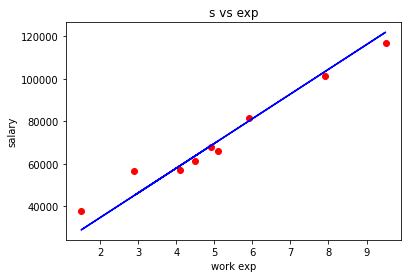

In [22]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,test_data_prediction,color='blue')
plt.xlabel('work exp')
plt.ylabel('salary')
plt.title('s vs exp')
plt.show()